In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

import os, os.path

from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA

In [2]:
# Loads data from house_1

def load_house_data(index):
    if index < 1 or index > 6:
        raise Exception('Valid house numbers are 1 to 5. Given number was: {}'.format(index))
    path = 'low_freq/house_{}/'.format(index)
    
    numChannels = len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))]) - 1
    channels = []
    for i in range(numChannels):
        ch = pd.read_csv(path + 'channel_{}.dat'.format(i + 1), delimiter=' ', names=['t', 'VA'])
        ch.t = pd.to_datetime(ch.t, unit='s')
        channels.append(ch)
    return channels
    
channels = load_house_data(1)
channels[5]

,t,VA
0,2011-04-18 13:22:13,0.0
1,2011-04-18 13:22:16,0.0
2,2011-04-18 13:22:20,0.0
3,2011-04-18 13:22:23,1.0
4,2011-04-18 13:22:26,0.0
5,2011-04-18 13:22:30,0.0
6,2011-04-18 13:22:33,0.0
7,2011-04-18 13:22:37,0.0
8,2011-04-18 13:22:40,0.0
9,2011-04-18 13:22:44,0.0


In [3]:
# Aggregate consumption by days
dayCons = []

for ch in channels:
    cons = ch.copy()
    
    cons = cons.set_index('t')
    
    cons = cons.groupby(pd.Grouper(freq='D')).transform(np.cumsum).resample('D').ohlc()

    cons = cons.reset_index()

    cons = cons[~cons.VA.open.isna()]

    cons.VA = cons.VA.high
    
    cons.VA *= 2.5 / (1e3 * 3600)  # Convert to kWh. Period between measures is 2.5 s
    
    dayCons.append(cons)

test5 = dayCons[5].iloc[:15, :]

validation5 = dayCons[5]

test5

t        VA                              
                   open      high       low     close
0  2011-04-18  0.000776  0.000776  0.000776  0.000776
1  2011-04-19  0.769049  0.769049  0.769049  0.769049
2  2011-04-20  0.000859  0.000859  0.000859  0.000859
3  2011-04-21  0.000665  0.000665  0.000665  0.000665
4  2011-04-22  0.000924  0.000924  0.000924  0.000924
5  2011-04-23  0.739076  0.739076  0.739076  0.739076
6  2011-04-24  0.680585  0.680585  0.680585  0.680585
7  2011-04-25  0.001368  0.001368  0.001368  0.001368
8  2011-04-26  1.193433  1.193433  1.193433  1.193433
9  2011-04-27  0.000224  0.000224  0.000224  0.000224
10 2011-04-28  0.000788  0.000788  0.000788  0.000788
11 2011-04-29  0.000416  0.000416  0.000416  0.000416
12 2011-04-30  0.773090  0.773090  0.773090  0.773090
13 2011-05-01  0.742131  0.742131  0.742131  0.742131
14 2011-05-02  0.000647  0.000647  0.000647  0.000647

In [4]:
ch5 = channels[5]
mask = (ch5.t > '2011-05-01') & (ch5.t <= '2011-05-02')
ch5.loc[mask]

,t,VA
275476,2011-05-01 00:00:01,0.0
275477,2011-05-01 00:00:04,0.0
275478,2011-05-01 00:00:08,0.0
275479,2011-05-01 00:00:11,0.0
275480,2011-05-01 00:00:15,0.0
275481,2011-05-01 00:00:18,0.0
275482,2011-05-01 00:00:21,0.0
275483,2011-05-01 00:00:25,0.0
275484,2011-05-01 00:00:28,0.0
275485,2011-05-01 00:00:32,0.0


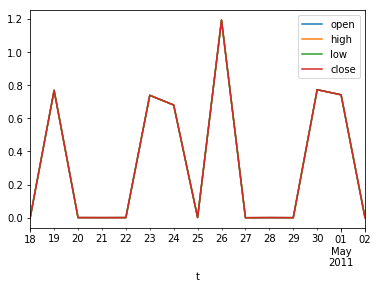

In [5]:
test5.plot(x='t', y='VA')

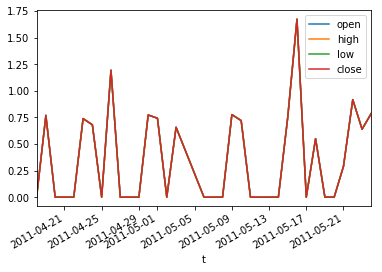

In [6]:
validation5.plot(x='t', y='VA')

                              ARMA Model Results                              
Dep. Variable:                   high   No. Observations:                   15
Model:                     ARMA(0, 1)   Log Likelihood                  -6.129
Method:                       css-mle   S.D. of innovations              0.332
Date:                Fri, 31 May 2019   AIC                             18.258
Time:                        16:08:58   BIC                             20.382
Sample:                             0   HQIC                            18.236
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3458      0.018     19.210      0.000       0.311       0.381
ma.L1.high    -0.9999      0.226     -4.424      0.001      -1.443      -0.557
                                    Roots           

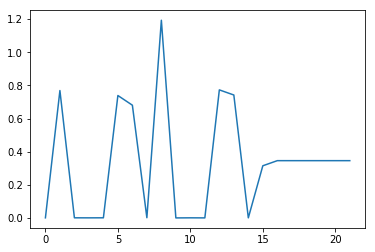

In [7]:
model = ARMA(test5.VA.high, (0, 1))
model_fit = model.fit(disp=0)

print(model_fit.summary())

predicted = model_fit.forecast(7)

arma01 = predicted[0]

print(predicted[0])
#print(len(predicted))
data = test5.VA.high.values
print(data)
data = np.append(data, np.array(predicted[0]))
print(data)
plt.plot(data)

[0.56343171 0.48024625 0.33882467 0.49534799 0.46298047 0.44671722
 0.49399978]


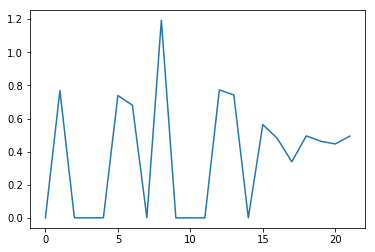

In [8]:
model = ARIMA(test5.VA.high, (2, 1, 0))
model_fit = model.fit(disp=0)

#print(model_fit.summary())

predicted = model_fit.forecast(7)

arima = predicted[0]

print(predicted[0])
data = test5.VA.high.values
data = np.append(data, np.array(predicted[0]))
plt.plot(data)

                              ARMA Model Results                              
Dep. Variable:                   high   No. Observations:                   15
Model:                     ARMA(1, 0)   Log Likelihood                  -7.579
Method:                       css-mle   S.D. of innovations              0.400
Date:                Fri, 31 May 2019   AIC                             21.157
Time:                        16:08:59   BIC                             23.281
Sample:                             0   HQIC                            21.134
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3359      0.084      3.997      0.002       0.171       0.501
ar.L1.high    -0.2511      0.252     -0.996      0.337      -0.745       0.243
                                    Roots           

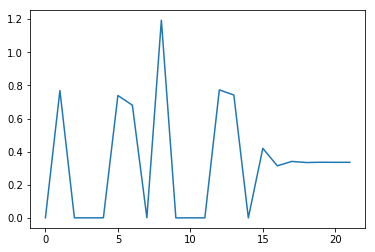

In [9]:
model = ARMA(test5.VA.high, (1, 0))
model_fit = model.fit(disp=0)

print(model_fit.summary())

predicted = model_fit.forecast(7)

arma10 = predicted[0]

print(predicted[0])
#print(len(predicted))
data = test5.VA.high.values
print(data)
data = np.append(data, np.array(predicted[0]))
print(data)
plt.plot(data)

In [10]:
test5.to_csv(index=False)
validation5.to_csv(index=False)
np.savetxt("arima.csv", arima, delimiter=',')
np.savetxt("arma01.csv", arma01, delimiter=',')
np.savetxt("arma10.csv", arma10, delimiter=',')